In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy.fft import fft, fftfreq

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
all_sub_data = []
subjects_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
for sub in subjects_list:
    path = "/content/drive/MyDrive/CSE 481 Capstone/data_preprocessed_python/s"+sub+".dat"
    x = pickle.load(open(path, 'rb'), encoding = 'latin1')
    sub_data = x['data']
    sub_eeg = sub_data[:, :32, 3 * 128:]  #indexing EEG signals from physiological data
    all_sub_data.extend(sub_eeg)
    print(sub)
all_sub_data = np.array(all_sub_data)
all_sub_data.shape

cpu
01
02
03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


(1280, 32, 7680)

In [7]:
# 32 particpants * 40 trials, 32 channels, 128 * 60 sec
all_sub_data.shape

(1280, 32, 7680)

(32, 7680)
[[ 4.05213     2.8912102  -1.77958774 ... -2.82648937 -4.47722969
  -3.67692812]
 [ 3.05326186  4.12852886 -0.01624823 ... -2.98702069 -6.28780884
  -4.47429041]
 [ 1.18607868  4.61642327  0.80339867 ... -2.6370776  -7.4065101
  -6.75590441]
 ...
 [ 2.74540878  3.13796149  4.58457769 ...  6.68885999  6.91232131
   5.66901722]
 [ 2.81410777  3.19246696  5.33090169 ...  2.6401731   6.57464869
   7.20846274]
 [ 3.66600597  4.67147056  5.00733153 ...  2.23958511  3.18256605
   4.70807159]]


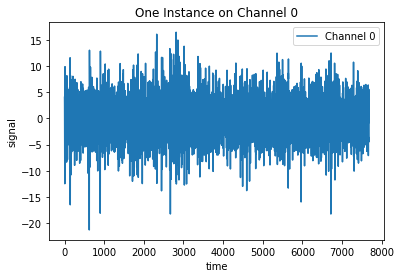

In [8]:
# plotting one instance
one_instance=all_sub_data[0]
print(one_instance.shape)
print(one_instance)

plt.title('One Instance on Channel 0')
plt.plot(np.linspace(1, 7680, 7680), one_instance[0], label='Channel {}'.format(0))
plt.xlabel('time')
plt.ylabel('signal')
plt.legend()
plt.show()

[-227.8772063 -0.j          -13.33497984+0.00804628j
  -13.3362521 +0.0149731j  ...  -13.33739286-0.02269142j
  -13.3362521 -0.0149731j   -13.33497984-0.00804628j]
[ 0.          0.01666667  0.03333333 ... -0.05       -0.03333333
 -0.01666667]
7680
3840
[0.00000000e+00 1.66666667e-02 3.33333333e-02 ... 6.39500000e+01
 6.39666667e+01 6.39833333e+01]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


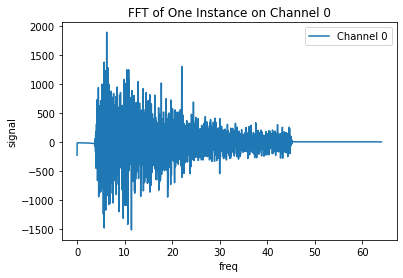

In [9]:
# Signal decomposition for one instance
one_instance.shape
one_channel = one_instance[0]
one_channel.shape
fourier = fft(one_channel)
freq = fftfreq(one_channel.size, 1/128)
print(fourier)
print(freq)
print(len(freq))
num = int(freq.size / 2)
print(num)
print(freq[:num])

# plot
plt.title('FFT of One Instance on Channel 0')
plt.plot(freq[:num], fourier[:num], label='Channel {}'.format(0))
plt.xlabel('freq')
plt.ylabel('signal')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


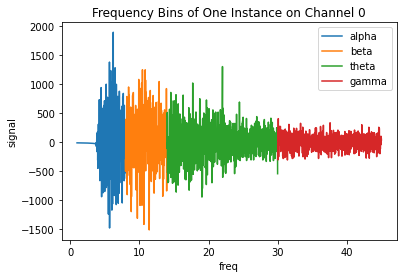

In [10]:
# Split into frequency bands for one instance
fourier = fourier[:num]
freq = freq[:num]
fftalpha = []
fftbeta = []
ffttheta = []
fftgamma = []
freqalpha = []
freqbeta = []
freqtheta = []
freqgamma = []
for i in range(freq.size):
  if (freq[i] >= 1 and freq[i] < 8):
    fftalpha.append(fourier[i])
    freqalpha.append(freq[i])
  elif (freq[i] >= 8 and freq[i] < 14):
    fftbeta.append(fourier[i])
    freqbeta.append(freq[i])
  elif (freq[i] >= 14 and freq[i] < 30):
    ffttheta.append(fourier[i])
    freqtheta.append(freq[i])
  elif (freq[i] >= 30 and freq[i] < 45):
    fftgamma.append(fourier[i])
    freqgamma.append(freq[i])
# plot
plt.title('Frequency Bins of One Instance on Channel 0')
plt.plot(freqalpha, fftalpha, label='alpha')
plt.plot(freqbeta, fftbeta, label='beta')
plt.plot(freqtheta, ffttheta, label='theta')
plt.plot(freqgamma, fftgamma, label='gamma')
plt.xlabel('freq')
plt.ylabel('signal')
plt.legend()
plt.show()

In [31]:
# 1280, 32, 7680 -> 1280, 32, 4, dependent on frequency range
# Still working on it so not complete yet, will most likely need to do time window stuff first anyway
# print(all_sub_data.shape)
# instancesNum = all_sub_data.shape[0]
# channelsNum = all_sub_data.shape[1]
# for i in range(instancesNum):
#   specific_instance = all_sub_data[i]
#   for j in range(channelsNum):
#     specific_channel = specific_instance[j]
#     fourier = fft(specific_channel)
#     freq = fftfreq(specific_channel.size, 1/128)
#     positiveFreq = int(freq.size / 2)
#     fourier = fourier[:positiveFreq]
#     freq = fourier[:positiveFreq]
#     fftalpha = []
#     fftbeta = []
#     ffttheta = []
#     fftgamma = []
#     freqalpha = []
#     freqbeta = []
#     freqtheta = []
#     freqgamma = []
#     print(freq.size)
#     for k in range(freq.size):
#       if (freq[k] >= 1 and freq[k] < 8):
#         fftalpha.append(fourier[k])
#         freqalpha.append(freq[k])
#       elif (freq[k] >= 8 and freq[k] < 14):
#         fftbeta.append(fourier[k])
#         freqbeta.append(freq[k])
#       elif (freq[k] >= 14 and freq[k] < 30):
#         ffttheta.append(fourier[k])
#         freqtheta.append(freq[k])
#       elif (freq[k] >= 30 and freq[k] < 45):
#         fftgamma.append(fourier[k])
#         freqgamma.append(freq[k])
#     new_arr = []
#     print(all_sub_data[i][j].shape)
#     new_arr.append(np.array(fftalpha))
#     new_arr.append(np.array(fftbeta))
#     new_arr.append(np.array(ffttheta))
#     new_arr.append(np.array(fftgamma))
#     print(len(fftalpha))
#     new_arr = np.array(new_arr)
      
#     print(new_arr.shape)
#     print(new_arr)
#     all_sub_data[i][j] = new_arr
#     print(all_sub_data[i][j].shape)

(1280, 32, 7680)
3840
(7680,)
1170
(4,)
[array([1.21839746-1.35869726e+03j, 6.90080783-2.35376511e+02j,
       5.58581274+3.39669861e+01j, ..., 3.17700573-4.87168021e-03j,
       3.17700707-3.24748294e-03j, 3.17701834-1.62138679e-03j])
 array([ 9.7302175 +408.29584342j, 12.6806249 +169.66196781j,
       11.13612164  -7.94650285j,  8.07595613 -15.80612452j,
       10.42374165-118.18337845j,  8.97690429-207.78864014j,
        8.33527973 +30.55981268j,  8.66924666+138.02685939j,
        8.59913617-226.47440993j, 10.0502421 +207.81925713j,
       12.49961315+138.83273524j, 10.48064759 +99.94636771j,
        9.37923151 +78.15176902j,  9.9579215  +33.019119j  ,
       13.58107853 +45.69296884j, 11.00603173 -17.96070656j,
        9.92022754-121.52391393j, 12.09889697+197.74303644j,
       13.1939047   +6.73272272j, 12.53233024 +73.66418588j,
        9.48567355 -27.0559988j , 11.66311103-203.22415742j,
       11.55542234-115.15385394j, 10.94483847-104.27237303j,
       10.38035808 +45.00505657

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


ValueError: ignored

In [35]:
# Might do actual valence, arousal numbers instead so could change
# Labels for 4 categories
labels = pd.read_excel("/content/drive/MyDrive/CSE 481 Capstone/metadata_xls/participant_ratings.xls")
print(labels.head())
sub_labels = []
for i in range(len(labels)):
  sub_labels.append([labels.loc[i, 'Valence'], labels.loc[i, 'Arousal']])
sub_labels = np.array(sub_labels)
print(sub_labels.shape)
print(sub_labels)

   Participant_id  Trial  Experiment_id  ...  Dominance  Liking  Familiarity
0               1      1              5  ...       7.19    6.05          4.0
1               1      2             18  ...       6.94    8.01          4.0
2               1      3              4  ...       6.12    8.06          4.0
3               1      4             24  ...       8.01    8.22          4.0
4               1      5             20  ...       7.19    8.13          1.0

[5 rows x 9 columns]
(1280, 2)
[[6.96 3.92]
 [7.23 7.15]
 [4.94 6.01]
 ...
 [8.05 7.09]
 [4.01 7.17]
 [4.08 5.95]]


In [ ]:
# Realized I can't do this until I'm done windowing and decomposing
X_train, X_test, y_train, y_test = train_test_split(all_sub_data, sub_labels, test_size = 0.1, random_state = 42,shuffle = True)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)